In [1]:
# Add relevant Jupyter notebook extensions 
%load_ext autoreload
%autoreload 2

In [2]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/Users/angelinnali/.venvs/B1-first-venv/lib/python3.12/site-packages', '/Users/angelinnali/Documents/Oxford/Yr3/B1_ComputingEngineering/b1-coding-practical-mt24', '/Users/angelinnali/Documents/Oxford/Yr3/B1_ComputingEngineering/b1-coding-practical-mt24/uuv_mission/control']


In [3]:
# check mission loading
from uuv_mission.dynamic import Mission
mission = Mission.from_csv("../data/mission.csv")
print(type(mission), len(mission.reference), mission.reference[:5]) 
 # Print some info about the mission to double-check it loaded correctly

<class 'uuv_mission.dynamic.Mission'> 100 [0.         2.9239131  5.51432416 7.48758532 8.65202856]


# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

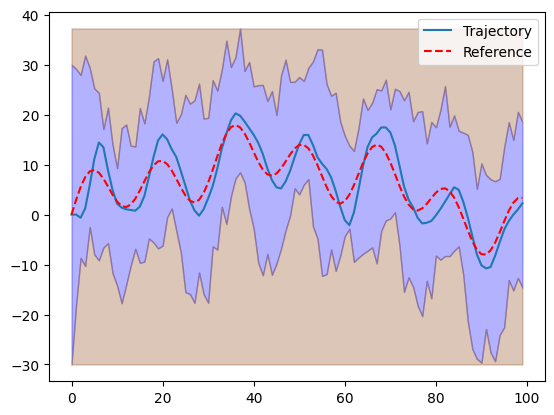

Kp=0.1, Kd=0.9


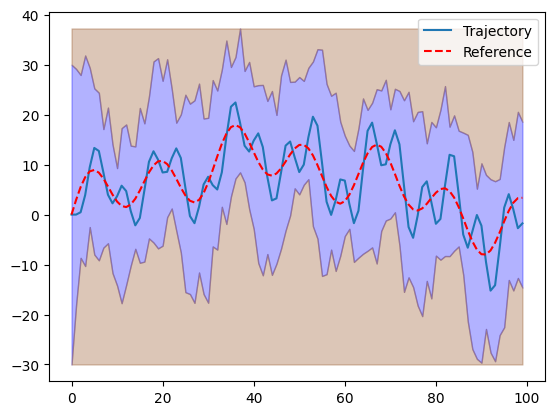

Kp=0.12, Kd=0.8


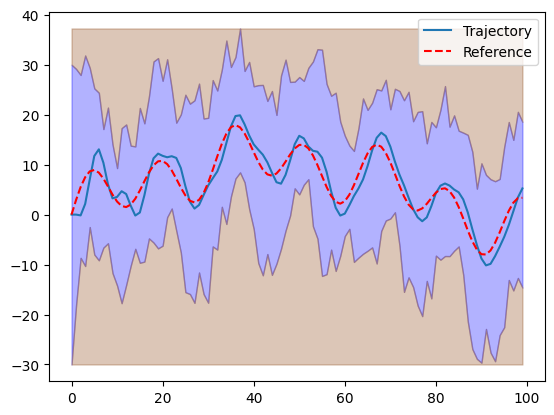

In [32]:
# Import relevant modules
import numpy as np
from uuv_mission.dynamic import Submarine, ClosedLoop, Mission
from uuv_mission.control import PDController

# Load mission from the data folder
mission = Mission.from_csv("../data/mission.csv") # You must implement this method in the Mission class

# Create submarine, controller, and closed-loop system
sub = Submarine()
controller = PDController(Kp=0.15, Kd=0.6)  # You can adjust the gains as needed
closed_loop = ClosedLoop(sub, controller)

# Simulate the closed-loop system with random disturbances
trajectory = closed_loop.simulate_with_random_disturbances(mission)
trajectory.plot_completed_mission(mission)


# Experiment with different PD controller gains
for Kp, Kd in [(0.1, 0.9), (0.12, 0.8)]:
    controller = PDController(Kp=Kp, Kd=Kd)
    loop = ClosedLoop(sub, controller)
    trajectory = loop.simulate_with_random_disturbances(mission, variance=0.2)
    print(f"Kp={Kp}, Kd={Kd}")
    trajectory.plot_completed_mission(mission)
